In [1]:
reads ='/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/03_filtering/reads12.tsv'

In [6]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads
import matplotlib.pyplot as plt
reso=10000

In [3]:
hic_data = load_hic_data_from_reads(reads,  reso)
matrix = hic_data.get_matrix(focus=None, diagonal=True, normalized=False)

In [7]:
len(matrix[0])

405

In [16]:
beg1, end1, beg2, end2 = map(lambda x: x / reso, [500000, 550000, 2000000, 2500000])

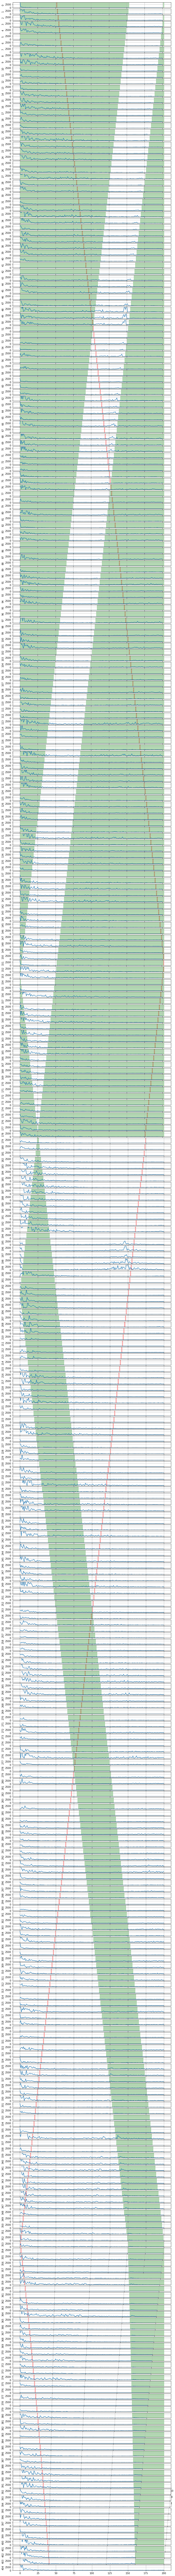

In [20]:
nrows = len(matrix)

plt.figure(figsize=(12, 200))
for k in xrange(nrows):
    dist = []
    for d in xrange(1, len(matrix)/2):
        if k - d >= 0 and k    + d < len(matrix):    
            summ = matrix[k][k-d]   + matrix[k][k+d] 
        elif k + d < len(matrix):                     
            summ = matrix[k][k-d]   + matrix[k][k+d] 
        elif k - d >= 0:                         
            summ = matrix[k][k-d]   + matrix[k][k+d-len(matrix)]
        else:                                   
            summ = matrix[k][k-d] + matrix[k][k+d-len(matrix)]
        dist.append(summ)
            
    if beg1 + k < nrows / 2:
        pos1 = beg1 + k
    else:
        pos1 = abs(nrows / 2 - (beg1 + k - nrows / 2))
        
    if beg2 + k < nrows / 2:
        pos2 = beg2 + k
    else:
        pos2 = abs(nrows / 2 - (beg2 + k - nrows / 2))
        
    if end2 + k < nrows / 2:
        pos3 = end2 + k
    else:
        pos3 = abs(nrows / 2 - (end2 + k - nrows / 2))
        
    plt.fill_between([pos1, pos1 + 1], 0, 4000, color='r', alpha=0.3)
    if pos3 > pos2:
        plt.fill_between([pos2, pos3], 0, 4000, color='g', alpha=0.3)             
    else:
        plt.fill_between([pos2, nrows / 2], 0, 4000, color='g', alpha=0.3)
        plt.fill_between([0   , pos3], 0, 4000, color='g', alpha=0.3)
    plt.subplot(nrows, 1, k + 1)
    plt.ylim(0, 4000)
    plt.plot(dist, alpha=1)
    plt.grid()
    plt.ylabel(k)
plt.show()